In [1]:
import os
import numpy as np
import argparse
import yolo.config as cfg
from utils.pascal_voc import pascal_voc
import cv2
import matplotlib.pyplot as plt
%matplotlib inline 


class new_pascal_voc(pascal_voc):
    def get(self):
        images = np.zeros(
            (self.batch_size, self.image_size, self.image_size, 3))
        labels = np.zeros(
            (self.batch_size, self.cell_size, self.cell_size, 25))
        imnames = []
        count = 0
        while count < self.batch_size:
            imname = self.gt_labels[self.cursor]['imname']
            flipped = self.gt_labels[self.cursor]['flipped']
            imnames.append(imname)
            print("imname: ", imname)
            print("flipped: ", flipped)
            images[count, :, :, :] = self.image_read(imname, flipped)
            labels[count, :, :, :] = self.gt_labels[self.cursor]['label']
            count += 1
            self.cursor += 1
            if self.cursor >= len(self.gt_labels):
                np.random.shuffle(self.gt_labels)
                self.cursor = 0
                self.epoch += 1
        return images, labels, imnames


Loading gt_labels from: data/pascal_voc/cache/pascal_train_gt_labels.pkl
Appending horizontally-flipped training examples ...
imname:  data/pascal_voc/VOCdevkit/VOC2007/JPEGImages/001284.jpg
flipped:  True
imname:  data/pascal_voc/VOCdevkit/VOC2007/JPEGImages/008985.jpg
flipped:  False
imname:  data/pascal_voc/VOCdevkit/VOC2007/JPEGImages/004869.jpg
flipped:  False
imname:  data/pascal_voc/VOCdevkit/VOC2007/JPEGImages/003674.jpg
flipped:  True
imname:  data/pascal_voc/VOCdevkit/VOC2007/JPEGImages/004023.jpg
flipped:  True
images.shape:  (5, 448, 448, 3)
labels.shape:  (5, 7, 7, 25)


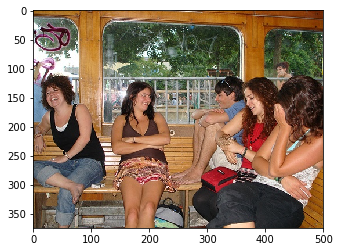

[[-0.10588235 -0.69411767 -0.94509804]
 [-0.10588235 -0.69411767 -0.94509804]
 [-0.10588235 -0.69411767 -0.94509804]
 ...
 [ 0.27058828 -0.19215685 -0.80392158]
 [ 0.23921573 -0.2235294  -0.83529413]
 [ 0.16078436 -0.30196077 -0.9137255 ]]


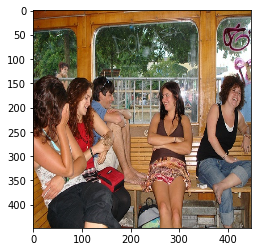

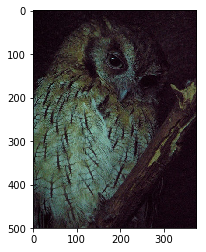

[[-0.92156863 -0.96862745 -0.95294118]
 [-0.92156863 -0.96862745 -0.95294118]
 [-0.92156863 -0.96862745 -0.95294118]
 ...
 [-0.81960785 -0.92941177 -0.88235295]
 [-0.80392158 -0.92156863 -0.86666667]
 [-0.78823531 -0.90588236 -0.8509804 ]]


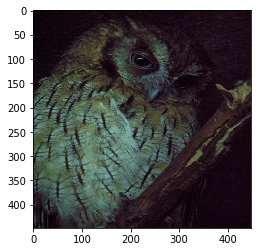

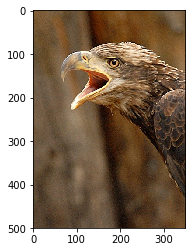

[[-0.00392157 -0.27058822 -0.62352943]
 [ 0.00392163 -0.27058822 -0.6156863 ]
 [ 0.01176476 -0.25490195 -0.59215689]
 ...
 [-0.10588235 -0.29411763 -0.53725493]
 [-0.14509803 -0.32549018 -0.56862748]
 [-0.20784312 -0.38823527 -0.62352943]]


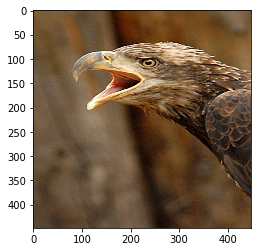

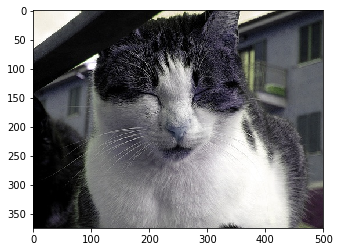

[[-0.89019608 -0.86666667 -0.79607844]
 [-0.8509804  -0.82745099 -0.75686276]
 [-0.89019608 -0.86666667 -0.79607844]
 ...
 [ 0.87450981  0.83529413  0.66274512]
 [ 0.89803922  0.88235295  0.67058825]
 [ 0.6156863   0.60784316  0.38823533]]


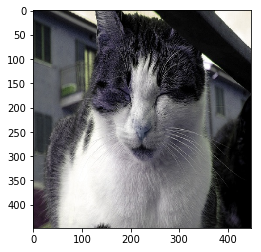

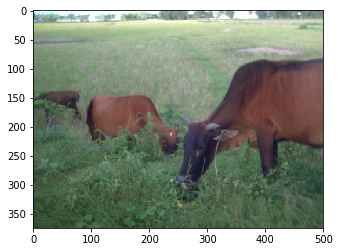

[[-0.26274508 -0.01960784 -0.13725489]
 [-0.19215685  0.05098045 -0.06666666]
 [-0.15294117  0.082353   -0.02745098]
 ...
 [ 0.71764708  0.98431373  0.97647059]
 [ 0.71764708  1.          0.99215686]
 [ 0.73333335  1.          1.        ]]


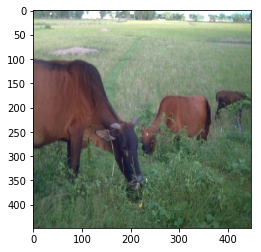

In [2]:

import skimage.io
pascal = new_pascal_voc('train')
images, labels, imnames = pascal.get()
print("images.shape: ", images.shape)
print("labels.shape: ", labels.shape)

for index, img in enumerate(images):
    image = cv2.imread(imnames[index])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#     image = skimage.io.imread(imnames[index])
    plt.imshow(image)
    plt.show()
    
    print(img[:][:][0])
    img = (img + 1.0) / 2.0
    plt.imshow(img)
    plt.show()
